In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
from copy import copy
from tqdm.notebook import tqdm
from multiprocessing import Pool
from simulation import Simulation_Base
from mip_solver import MIP_solver
import itertools

class Simulation_F(Simulation_Base):
    number = 5
    cutoff_days = 100
    exponent_book_points = 1.2
    
    def __init__(self, silent=False):
        Simulation_Base.__init__(self, number=self.number, silent=silent)
        
    def init_ind_lib_current(self):
        self.lib_available = (sim.lib_days <= self.cutoff_days).astype(int)
        self.ind_libs_current = np.where(self.lib_available == 1)[0]    
        self.length_ind_libs_current = len(self.ind_libs_current) 
        self.max_num_books = self.lib_num_books.max()
        self.lib_books_points = []
        for books in self.lib_books_lists:
            points_aug = np.concatenate([np.array([0]), np.array(self.book_points[books]), np.zeros(self.max_num_books - len(books), dtype = int)])
            self.lib_books_points.append(points_aug)
        self.lib_books_points = np.stack(self.lib_books_points) ** self.exponent_book_points
        self.lib_books_points_cum = np.cumsum(self.lib_books_points, axis = 1)
        self.energy_current = self.get_energy(self.ind_libs_current)
         
    def get_ind_libs_next(self):
        inds = np.random.randint(0, self.length_ind_libs_current, size=2)
        ind_libs_next = copy(self.ind_libs_current)
        ind_libs_next[inds] = self.ind_libs_current[inds[::-1]]
        return ind_libs_next
    
    def get_energy(self, ind_libs):
        days_remaining = self.num_days - np.cumsum(self.lib_days[ind_libs])
        books_remaining = np.clip(days_remaining * self.lib_ships[ind_libs], 0, self.max_num_books)
        points = self.lib_books_points_cum[ind_libs, books_remaining]
        return -points.sum()
    
    def transition(self):
        ind_libs_next = self.get_ind_libs_next()
        energy_next = self.get_energy(ind_libs_next)
        tresh = np.exp((self.energy_current - energy_next) / self.temparature)
        if np.random.rand() < tresh:
            self.energy_current = energy_next
            self.ind_libs_current = ind_libs_next
            
    def get_current_score(self):
        days_remaining = np.clip(self.num_days - np.cumsum(self.lib_days[self.ind_libs_current]), 0, self.num_days)
        num_libs = np.argwhere(days_remaining != 0).shape[0]
        self.ind_libs_best = self.ind_libs_current[:num_libs]
        self.solution = self.mip.get_optimal_books_for_ordered_libs(self.ind_libs_best)
        return self.get_score()
        
    def run(self, seed = 1337):
        self.seed = seed
        np.random.seed(seed)
        self.init_ind_lib_current()
        self.temparature = 50000
        self.mip = MIP_solver(self)
        
        for i in tqdm(range(2000000)):
            self.transition()
            if i % 10000 == 0:
                self.temparature /= 1.05
            if i % 100000 == 0:
                print(self.energy_current, self.temparature)
            if i % 1000000 == 999999:
                print(self.energy_current, self.temparature, self.get_current_score())
        
    
        

sim = Simulation_F()
sim.run()
# print(sim.get_score())
# sim.write()

-5953826.821077976 47619.04761904762
-19549414.891029943 29233.964454321864
-19549134.071944147 17947.11823204764
-19597212.17507348 11017.973745517042
-19620771.099978153 6764.080109537031
-19620771.099978153 4152.558427256214
-19620771.099978153 2549.3106545949595
-19620771.099978156 1565.0555982485137
-19620771.099978153 960.8083742929241
-19620771.099978156 589.8529950913764
-19620771.099978153 380.22449989367374 5348248
-19620771.099978153 362.1185713273083
-19620771.099978156 222.3093902910793
-19620771.099978153 136.4786810862589
-19620771.099978156 83.78607114461686
-19620771.099978156 51.437379537789255
-19620771.099978156 31.57808902565508
-19620771.099978156 19.38620737433965
-19620771.099978153 11.901449642996711
-19620771.099978156 7.3064576721836145
-19620771.099978153 4.485531201388083
-19620771.099978156 2.891413406387885 5348248



In [3]:
print(len(sim.ind_libs_available))

AttributeError: 'Simulation_E' object has no attribute 'ind_libs_available'

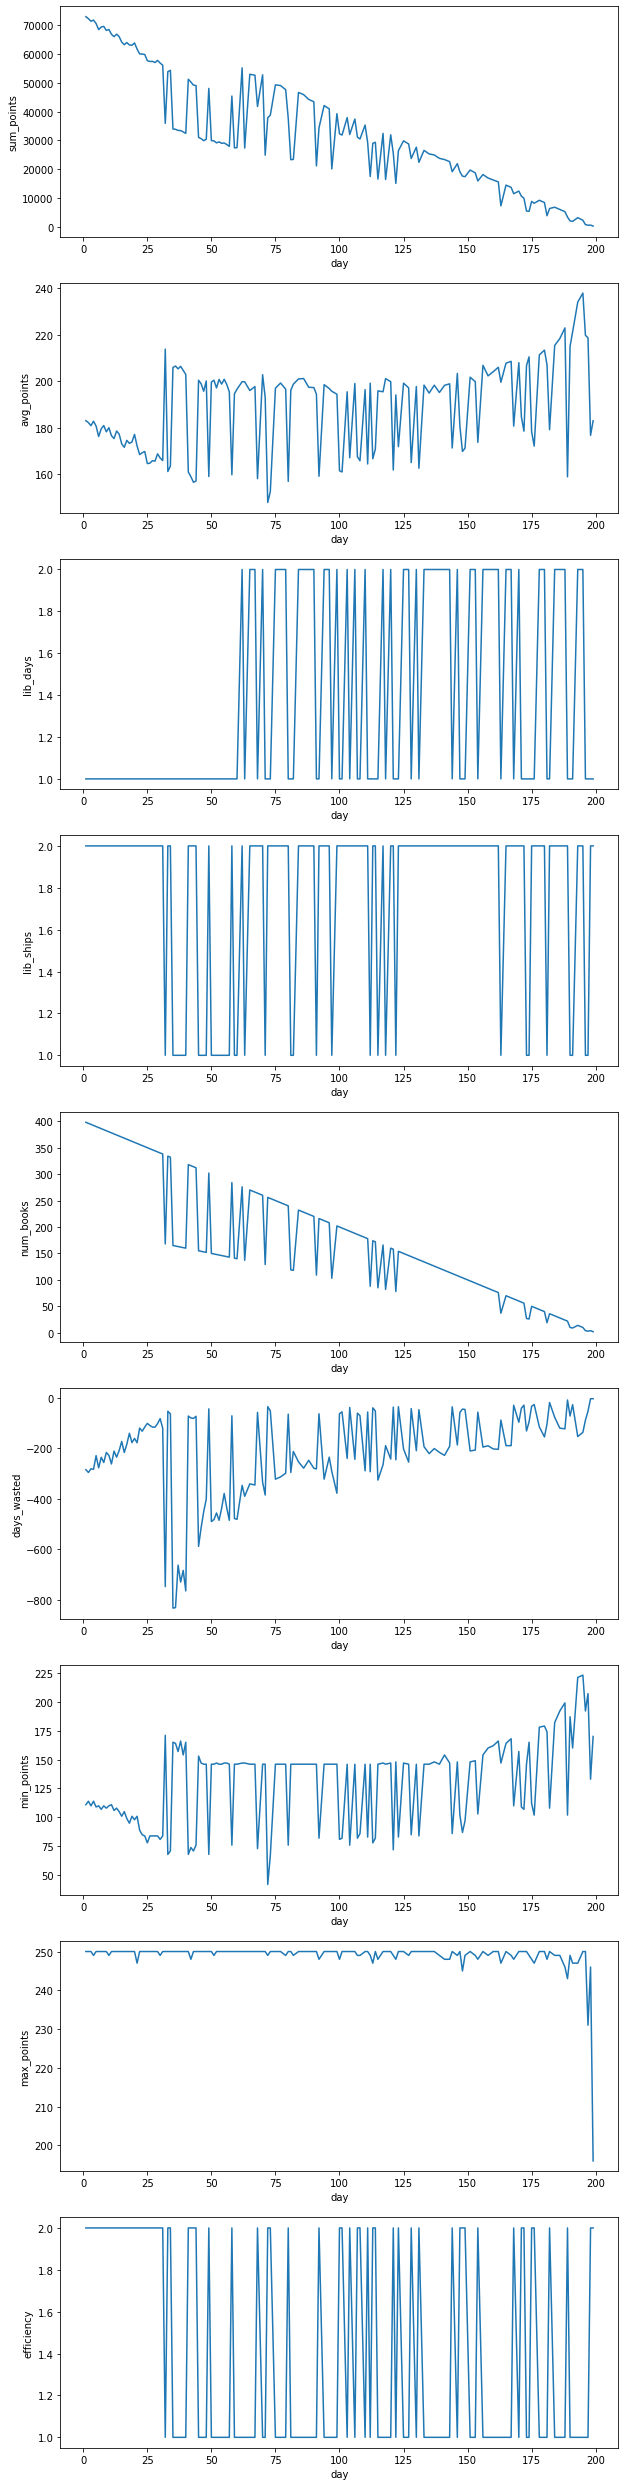

In [3]:
sim.plot_solution()

In [1]:
3 in [1,2,3]

True

In [17]:
np.extract((np.arange(10)+10) > 15)

TypeError: _extract_dispatcher() missing 1 required positional argument: 'arr'

In [46]:
l1 = [210, 694, 595, 204, 901, 719, 774, 618, 622, 422, 312, 147, 369, 672, 828, 454, 431, 209, 112]
l2 = [210, 595, 422, 694, 369, 672, 719, 312, 901, 204, 774, 147, 828, 622, 618, 454, 431]
l3 = [210, 694, 595, 774, 204, 719, 901, 147, 422, 312, 672, 369, 828, 622, 618, 454, 431]

[204,
 694,
 719,
 595,
 774,
 210,
 901,
 618,
 622,
 422,
 369,
 312,
 147,
 672,
 828,
 454,
 112]

len(set(l2).intersection(set(l1)))

17

In [45]:
arr = np.random.rand(10)
arr.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])